# DS8017 - Assignment 2

### Nujaimah Ahmed - 500955409
#### Github Repo: https://github.com/nujaimah/Graph-Mining/tree/main

In [16]:
## import required packages for Assignment
datadir = "../Datasets/"

In [17]:
## retrieve datasets
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import powerlaw
from scipy.stats import poisson
from scipy.optimize import fsolve
import random
import math
from math import log, exp, comb

## Question 3)

In [18]:
# set to 100 nodes for first graph
n = 100

random.seed(123)
Repeats = 1000  ## number of repeats for each 'c' value, 1000 repeats
lo = -int(np.floor(np.log(n) * 10)) / 10
if lo < -3:
    lo = -3
c_range = np.arange(lo, 3.1, 0.1)
iso_avg = []
iso_std = []

## loop over 'c' values
for c in c_range:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2 * n)
    for rep in range(Repeats):
        ## create random graph g
        g = ig.Graph.Erdos_Renyi(n = n, p = p)
        ## find degrees of all nodes in random graph
        degrees = g.degree()  
        ## find num of isolated edges (where two nodes both have degree 1) 
        isolated_edges = sum(1 for v1, v2 in g.get_edgelist() if degrees[v1] == 1 and degrees[v2] == 1)
        ## store num of isolated edges in x 
        x.append(isolated_edges)
    iso_avg.append(np.mean(x))
    iso_std.append(np.std(x))

## theoretical value
th = [np.exp(-c)/4 for c in c_range]

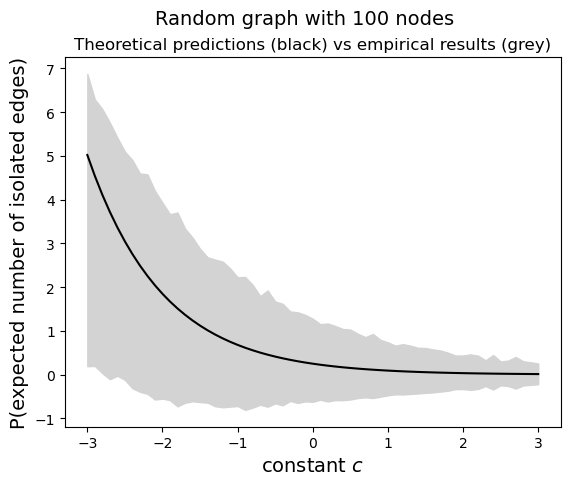

In [19]:
## plot empirical results (confidence intervals) and theoretical values
plt.fill_between(
    c_range,
    [x[0] - 1.654 * x[1] for x in zip(iso_avg, iso_std)],
    [x[0] + 1.645 * x[1] for x in zip(iso_avg, iso_std)],
    color="lightgray",
)
plt.plot(c_range, th, color = "black")
plt.suptitle("Random graph with " + str(n) + " nodes", fontsize = 14)
plt.title("Theoretical predictions (black) vs empirical results (grey)", fontsize = 12)
plt.xlabel(r"constant $c$", fontsize = 14)
plt.ylabel("P(expected number of isolated edges)", fontsize = 14);

In [20]:
## set to 10,000 nodes for second graph
n = 10000

random.seed(123)
Repeats = 1000  ## number of repeats for each 'c' value
lo = -int(np.floor(np.log(n) * 10)) / 10
if lo < -3:
    lo = -3
c_range = np.arange(lo, 3.1, 0.1)
iso_avg = []
iso_std = []

## loop over 'c' values
for c in c_range:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2 * n)
    for rep in range(Repeats):
        ## create random graph g
        g = ig.Graph.Erdos_Renyi(n = n, p = p)
        ## find degrees of all nodes in random graph
        degrees = g.degree()  
        ## find isolated edges (where two nodes both have degree 1)
        isolated_edges = sum(1 for v1, v2 in g.get_edgelist() if degrees[v1] == 1 and degrees[v2] == 1)
        ## store num of isolated edges in x
        x.append(isolated_edges)
    iso_avg.append(np.mean(x))
    iso_std.append(np.std(x))

## theoretical value
th = [np.exp(-c)/4 for c in c_range]

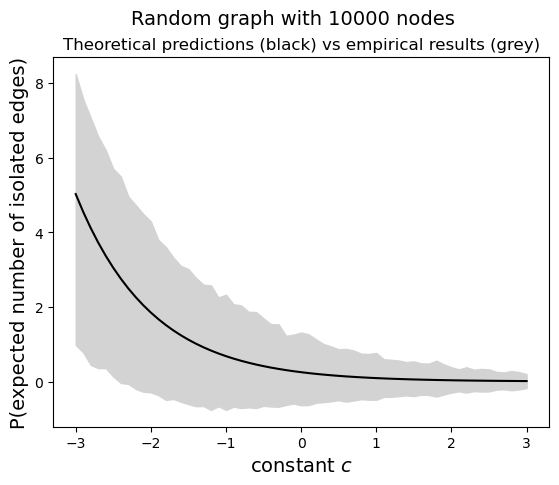

In [21]:
## plot empirical results (confidence intervals) and theoretical values
plt.fill_between(
    c_range,
    [x[0] - 1.654 * x[1] for x in zip(iso_avg, iso_std)],
    [x[0] + 1.645 * x[1] for x in zip(iso_avg, iso_std)],
    color="lightgray",
)
plt.plot(c_range, th, color = "black")
plt.suptitle("Random graph with " + str(n) + " nodes", fontsize=14)
plt.title("Theoretical predictions (black) vs empirical results (grey)", fontsize=12)
plt.xlabel(r"constant $c$", fontsize = 14)
plt.ylabel("P(expected number of isolated edges)", fontsize = 14);

### Question 3 Analysis

Two graphs are produced in Question 1, both demonstrating the theoretical vs empirical graphs of the probability of the expected number of isolated edges produced from graph g(n,p). The graphs are produced from 1,000 independent runs for small graphs on n = 100 nodes and larger graphs on n = 10,000 nodes. The shaded regions correspond to the 90% confidence intervals for the estimated obtained with 1,000 runs and the black line represents correspond to the theoretical values. Although there is large variability shown in the empirical graph, there is agreement between the theoretical and empirical graph, the results fall within the intervals and are quite close to the corresponding expected value for both graphs. However, it is evident that as the number of nodes increase, the graph gets smoother, and closer to the expected value with a smaller variability. For the graph where n = 10,0000 there is more agreement, the variability is smaller and the curves are slightly less jagged. If the size of nodes were further increased, there would most likely be even better agreement between the theoretical and empirical graphs. 

## Question 6)

In [22]:
n = 10000
p = 1/4

## generate two random graphs g1 and g2
g1 = ig.Graph.Erdos_Renyi(n = n, p = p)
g2 = ig.Graph.Erdos_Renyi(n = n, p = p)

## take union of two graphs
g_union = g1.union(g2)

## calculate density of union graph
# binomial coefficient 
total_edges = math.comb(n,2)
# ratio between number of edges in union graph and binomial coefficient
density = g_union.ecount() / total_edges

## calculate percent diff
diff = abs(density - 0.5) / ((density + 0.5) / 2) * 100

print(f"The density of the union of the G1 and G2 is: {density:.6f}")
print(f"The % diff between the calculated and expected value is: {diff:.1f}%")

The density of the union of the G1 and G2 is: 0.437587
The % diff between the calculated and expected value is: 13.3%


### Question 6 Analysis

The density of the union graph (i.e. the probability that an edge is present in the graph) is approx 0.4376.

This value is close but smaller than the expected density of 0.5. There is a 13.3% difference between the expected and calculated value.

The reasoning for this difference may be to when implementing the union of the two graphs, if the graphs have overlapping edges (identical edges found in both graphs), these overlapping edges are considered as one unique edge instead of two separate unique edges and thus, it reduces the overall density of certain edges as the number of unique edges decrease.

The expected density value considers the overlapping edges to be separate edges resulting in a higher expected density.

The calculated density formulates to be 1−(1−p)^2 for p = 1/4 and results to 7/16 instead of 1/4. 


## Question 7)

In [23]:
## set parameter values
dim = 2 ## dimension of the lattice
size = 100 ## the size of the lattice along each dimension
nei = 8 ## the average degree
p_range = np.arange(0, 1.01, 0.05) ## set range for p 
Repeats = 10 ## 10 repititions to smooth graph

global_clustering = []

## loop over p values for average global clustering coefficient
for p in p_range:
    x = []
    for rep in range(Repeats):
        g = ig.Graph.Watts_Strogatz(dim, size, nei, p)
        # global clustering
        x.append(g.transitivity_undirected(mode = "nan"))
    
    global_clustering.append(np.mean(x))

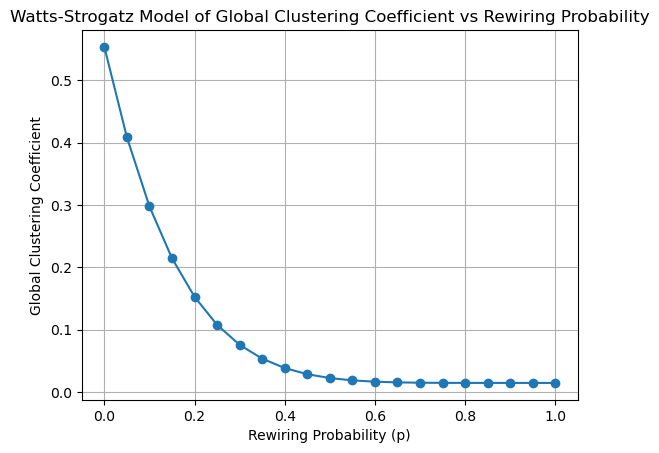

In [24]:
## plot global clustering coefficient
plt.plot(p_range, global_clustering, marker = "o")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Global Clustering Coefficient")
plt.title("Watts-Strogatz Model of Global Clustering Coefficient vs Rewiring Probability")
plt.grid(True)

In [25]:
## set parameter values
dim = 2 ## dimension of the lattice
size = 100 ## the size of the lattice along each dimension
nei = 8 ## the average degree
p_range = np.arange(0, 1.01, 0.05) ## set range for p 
Repeats = 10 ## 10 repititions to smooth graph

local_clustering = []

## loop over p values for average local clustering coefficient
for p in p_range:
    x = []
    for rep in range(Repeats):
        g = ig.Graph.Watts_Strogatz(dim, size, nei, p)
        # average local clustering
        x.append(np.mean(g.transitivity_avglocal_undirected(mode = "nan")))
        
    local_clustering.append(np.mean(x))

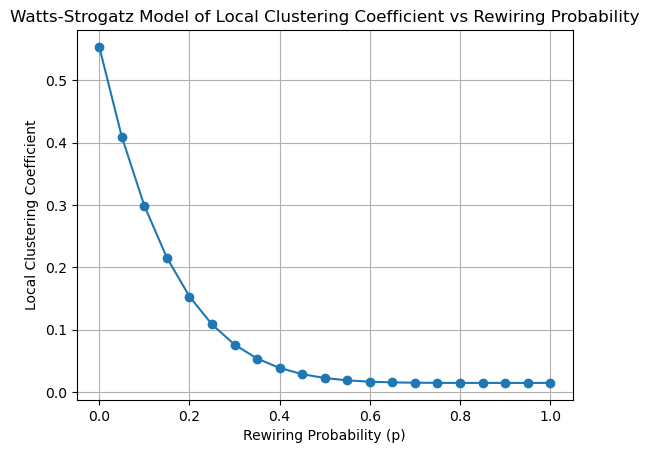

In [26]:
## plot average local clustering coefficient 
plt.plot(p_range, local_clustering, marker = "o")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Local Clustering Coefficient")
plt.title("Watts-Strogatz Model of Local Clustering Coefficient vs Rewiring Probability")
plt.grid(True)

### Question 7 Analysis

The result of the global and average local clustering coefficients graphs produced in question 7 demonstrate almost the exact same graph. Each graph was repeated 10 times for a smoother curve. 

## Question 8)

Calculating best minimal value for power law fit
Range of degrees in graph: 5 2357

gamma: 2.223726003656432
Value of l': 17.0
KS statistic: 0.02285095846305596


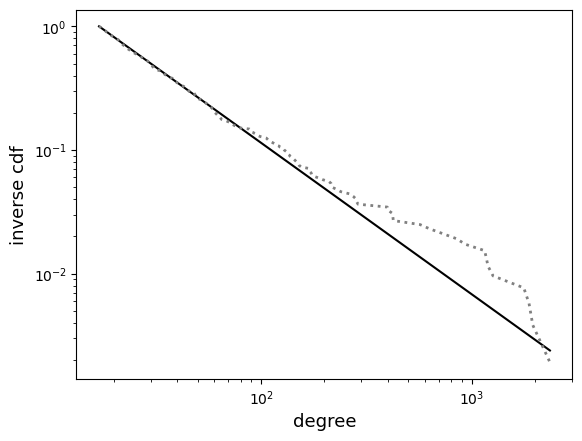

In [27]:
n = 10000 ## number of nodes
m = 5 ## number of directed edges in each 
graph = ig.Graph.Barabasi(n, m, directed = True) ## implement Preferential Attachment model using Barabasi

## use Kolmogorov-Smirnov test to estimate degree exponent, l' (xmin), and gamma (alpha)
deg = graph.degree()
X = powerlaw.Fit(deg)
print("Range of degrees in graph:", min(deg), max(deg))
print("\ngamma:", X.power_law.alpha)
print("Value of l':", X.power_law.xmin)
print("KS statistic:", X.power_law.D)

## plot inverse cumulative in-degree distribution
fig1 = X.power_law.plot_ccdf(color="black", linestyle="-")
fig1 = X.plot_ccdf(
    ax=fig1, linewidth=2, color="gray", original_data=False, linestyle=":"
)
fig1.set_xlabel("degree", fontsize=13)
fig1.set_ylabel("inverse cdf", fontsize=13);

### Question 8 Analysis

The result of question 8 is an inverse cumulative degree distribution with n = 10,000 nodes which was implemented using the Preferential Attachment model. The degree exponent is estimated to be 2.22 (gamma = 2.22), which was obtained using the Kolmogorov-Smirnov test with l' = 17. The empirical and theoretical graphs have a good fit and strong agreement with discrepencies towards the end, which is normal.